# LESSON 3: LINEAR REGRESSION
<img src="../images/linear_logistic_regression_logo.jpeg" width="600px"/>

*This lecture was refered by [machinelearningcoban.com](https://machinelearningcoban.com/2016/12/28/linearregression/)*

## 1. Linear regression introduction

<img src="../images/ml_house_prices_example.png" width="400px"/>

With an example of **House price prediction** problem, we have 3 features of a house:
- ${x}_{1}$ is the size of the house (in ${m}^{2}$)
- ${x}_{2}$ is the number of bedrooms in the house (in rooms)
- ${x}_{3}$ is the distance from the house to the city center (in km)
and the label price of the house $y$

We have to build a function to calculate the price of the house from above features $x=[x_1, x_2, x_3]$.

<center>
    $\hat{y} = w_0 + w_1 x_1 + w_2 x_2 + w_3 x_3$
</center>

- $w=[w_0, w_1, w_2, w_3]^{T}$ is parameters of model
- $\hat{y}$ is a prediction of model and we expect that $\hat{y}$ and $y$ are almost similar.

We use a **linear** function and this is **regression** problem. That's why we call **LINEAR REGRESSION**.

## 2. Loss function and Optimizer
Generalize our problem to n features, we have a set of features $x=[x_1, x_2, ..., x_n]$.

<center>
    $\hat{y}=w_0 + w_1 x_1 + w_2 x_2 +...+ w_n x_n$
</center>

Given $N$ training samples $X = x^{(1)}, x^{(2)},..., x^{(N)}$, linear regression finds $w$ that minimizes the difference between $\hat{y}$ and $y$.

To minimize the difference, we have to build a **LOSS FUNCTION** and for linear regression, we use Mean Square Error (MSE).

<center>
    \[
    MSE(w)
    = \frac{1}{N}\frac{1}{2}\sum_{i=1}^{N}(\hat{y}^{(i)} - y^{(i)})^2 \\
    = \frac{1}{N}\frac{1}{2}\sum_{i=1}^{N}(x^{(i)}w - y^{(i)})^2 \\
    = \frac{1}{N}\frac{1}{2}(Xw - y)^2
    \]
</center>

We need to find the $w$ to minimize the value of MSE function and this $w$ called an ***optimal point***.

<center>
    $w^{*} = \arg\min_{w} \mathcal{L}(w)$
</center>

To find the optimal point $w^{*}$, we solve the equation:

<center>
    \[
    \frac{\partial MSE}{\partial w}
    = \frac{1}{N}\frac{1}{2}\cdot2\cdot(Xw - y)\cdot{X}^{T} \\
    = \frac{1}{N}{X}^{T}\cdot(Xw - y) = 0
    \]
</center>

We can have the above equation because we have:
<center>
    \[
    \frac{\partial Ax+b}{\partial x} = {A}^{T}
    \]
</center>

and $(Xw - y)$ is a scalar so we can use the commutative principle.

Back to the equation
<center>
    \[
    {X}^{T}\cdot(Xw - y) = 0 \\
    {X}^{T}Xw = {X}^{T}y \\
    w = {({X}^{T}X})^{-1}{X}^{T}y
    \]
</center>

Finally, we have $w^{*} = {({X}^{T}X})^{-1}{X}^{T}y$ is the solution of $\frac{\partial MSE}{\partial w} = 0$

## 3. Implementation example

### 3.1. Prepare library and data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('../data/linear_regression_salary_data.csv')
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [3]:
year = df.YearsExperience.to_list()
salary = df.Salary.to_list()

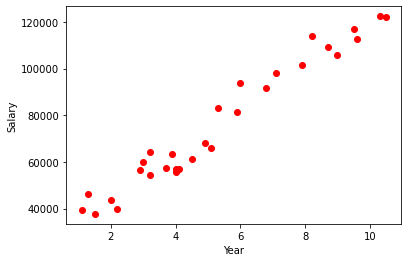

In [4]:
plt.plot(year, salary, 'ro')
plt.xlabel('Year')
plt.ylabel('Salary')
plt.show()

In [5]:
X = np.array([year])
X.shape

(1, 30)

In [6]:
y = np.array([salary])
y.shape

(1, 30)

In [7]:
def prepare_X_ones(X):
    x_1 = np.ones_like(X)
    print('x_0.shape', x_1.shape)

    X = np.concatenate((x_1, X), axis=0).T
    print('X.shape', X.shape)

    return X

In [8]:
X_with_1 = prepare_X_ones(X)

x_0.shape (1, 30)
X.shape (30, 2)


### 3.2. Implement from scratch

In [9]:
class MyLinearRegression():
    def __call__(self, X, y):
        A = np.dot(X.T, X)
        print('A.shape', A.shape)

        b = np.dot(X.T, y.T)
        print('b.shape', b.shape)

        self.w = np.dot(np.linalg.pinv(A), b)
    
    def display(self, X, y):
        reg_x = np.linspace(0, 10, 2)
        reg_y = self.w[0][0] + self.w[1][0] * reg_x

        plt.plot(X, y, 'ro')
        plt.plot(reg_x, reg_y)
        plt.xlabel('Year')
        plt.ylabel('Salary')
        plt.show()

In [10]:
my_linear_regression = MyLinearRegression()

In [11]:
my_linear_regression(X_with_1, y)

A.shape (2, 2)
b.shape (2, 1)


In [12]:
w = my_linear_regression.w
w.shape

(2, 1)

In [13]:
w

array([[25792.20019867],
       [ 9449.96232146]])

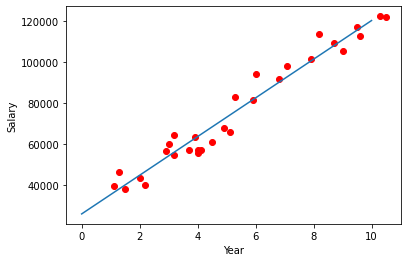

In [14]:
my_linear_regression.display(X, y)

### 3.3. Use `sklearn`

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
sklearn_linear_regression = LinearRegression(fit_intercept=False)
sklearn_linear_regression

LinearRegression(fit_intercept=False)

In [17]:
sklearn_linear_regression.fit(X_with_1, y.T)

LinearRegression(fit_intercept=False)

In [18]:
sklearn_linear_regression.coef_

array([[25792.20019867,  9449.96232146]])

In [19]:
w

array([[25792.20019867],
       [ 9449.96232146]])

## 4. Homework
### 4.1. Compare regression evaluation metrics: MSE and RMSE, MAE, R-Squared (Coefficient of determination)
### 4.2. What is regularization? Compare L1 and L2 regularization